# Final Presentation Notebook  
### Group 11 — An Exploratory Data Analysis on Malignant Breast Cancer Cells  
This notebook consolidates **all datasets, all EDA, and all visualizations** using the updated visualizer structure.

### Datasets:
- **Dataset 1:** Wisconsin Breast Cancer (Original)
- **Dataset 2:** Coimbra Breast Cancer (Metabolic)
- **Dataset 3:** Wisconsin Breast Cancer (Diagnostic)

All plots use:
- Cleaned and unified target variables  
- Updated palette (0 = benign/healthy, 1 = malignant/patient)  
- Dataset-specific functions

In [1]:
# ========== IMPORTS ==========

import sys
sys.path.append('./src')

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import src.data_loader as data_loader
import src.data_preprocessor as data_preprocessor
import src.visualizer as viz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

print("All modules loaded successfully!")


All modules loaded successfully!


In [ ]:
from IPython.display import Markdown

Markdown("""
# Final Presentation Notebook  
### Group 11 — ECE143 Data Science in Practice  
This notebook consolidates **all datasets, all EDA, and all visualizations** using the updated visualizer structure.

### Datasets:
- **Dataset 1:** Wisconsin Breast Cancer (Original)
- **Dataset 2:** Coimbra Breast Cancer (Metabolic)
- **Dataset 3:** Wisconsin Breast Cancer (Diagnostic Imaging)

All plots use:
- Cleaned and unified target variables  
- Updated palette (0 = benign/healthy, 1 = malignant/patient)  
- Dataset-specific functions  
""")


In [3]:
raw_df1 = data_loader.load_dataset1_raw("dataset/breast_cancer_bd.csv")
df1 = data_preprocessor.clean_dataset1(raw_df1)
df1.head()


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis,Is_Malignant
0,5,1,1,1,2,1.0,3,1,1,2,0
1,5,4,4,5,7,10.0,3,2,1,2,0
2,3,1,1,1,2,2.0,3,1,1,2,0
3,6,8,8,1,3,4.0,3,7,1,2,0
4,4,1,1,3,2,1.0,3,1,1,2,0


In [4]:
display(df1.describe())
df1['Is_Malignant'].value_counts()


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis,Is_Malignant
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,4.451852,3.146667,3.208889,2.848889,3.229630,3.537778,3.442963,2.885926,1.607407,2.699259,0.349630
std,2.820859,3.055005,2.976552,2.875917,2.208497,3.637871,2.453894,3.065607,1.741006,0.954413,0.477207
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,1.000000


Is_Malignant
0    439
1    236
Name: count, dtype: int64

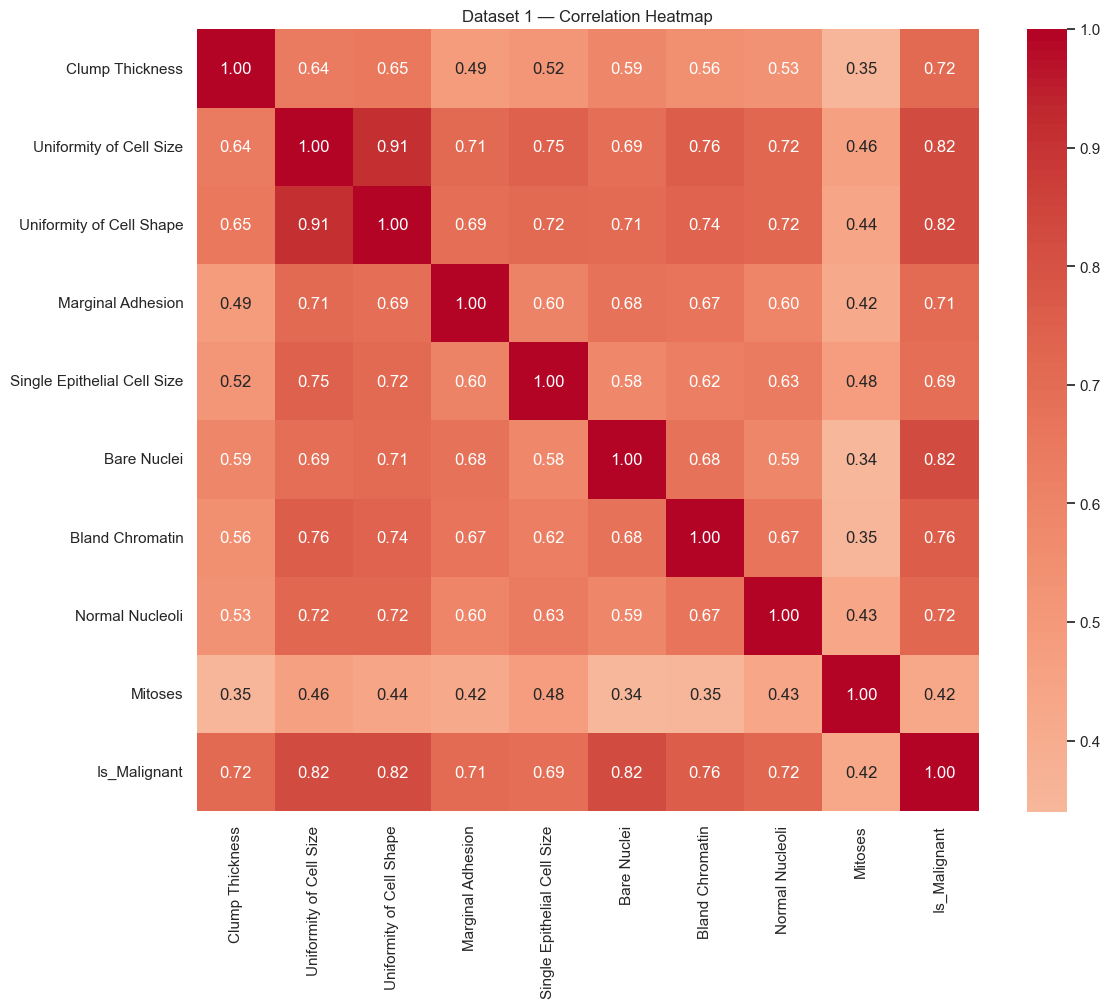

In [5]:
viz.plot_d1_heatmap(df1)


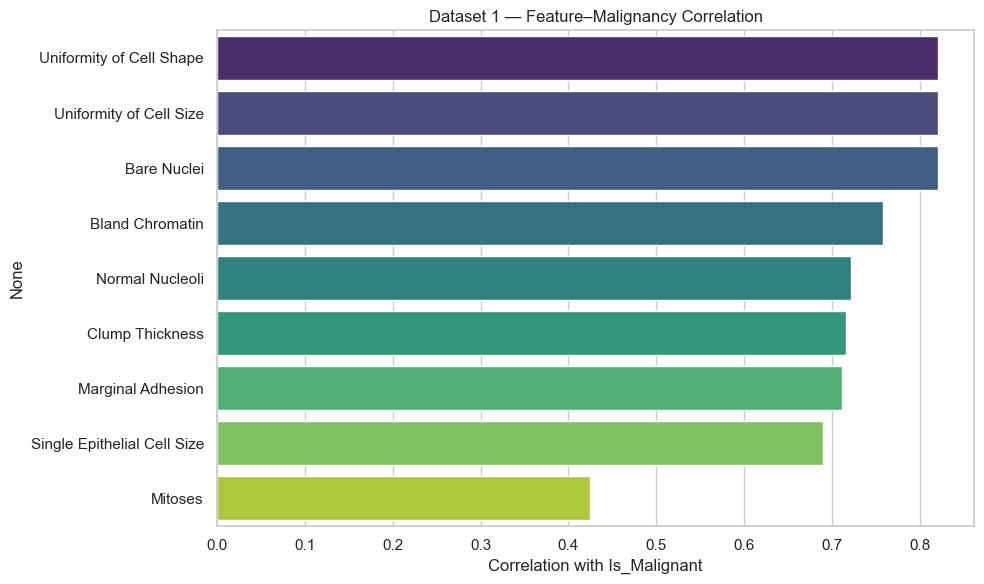

In [6]:
viz.plot_d1_feature_ranking(df1)


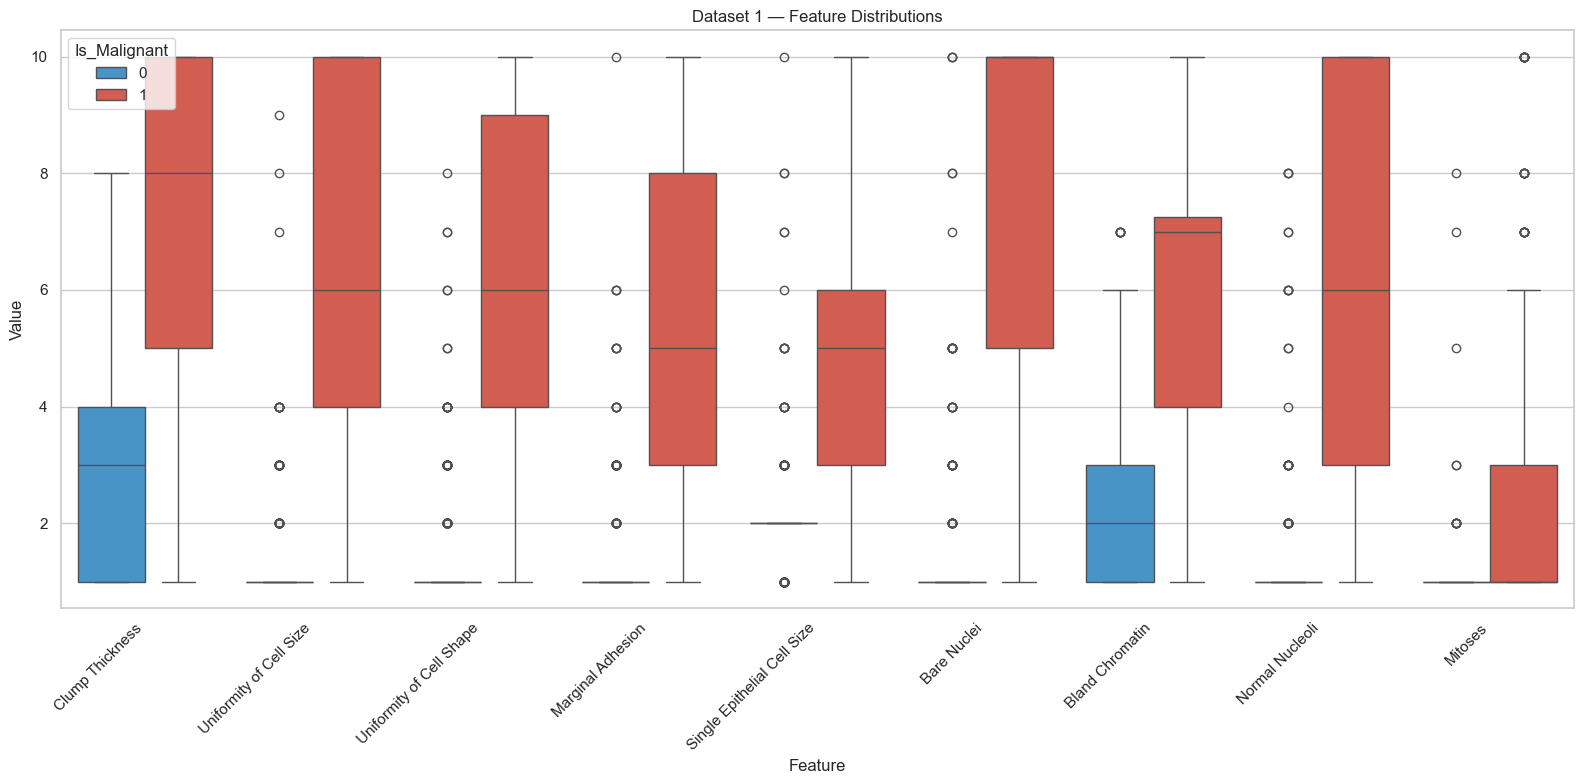

In [7]:
viz.plot_d1_boxplots(df1)


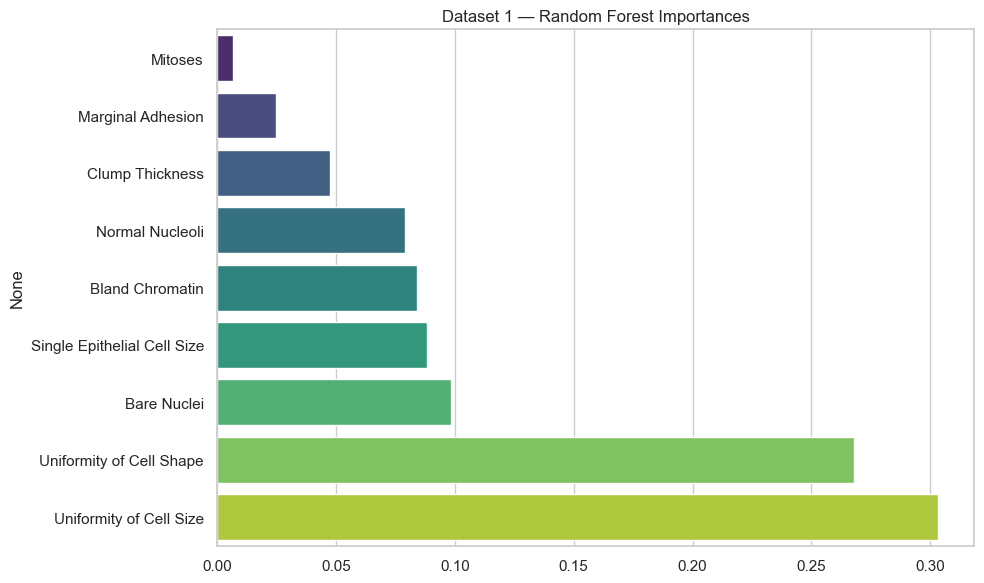

In [8]:
X1 = df1.drop(columns=["Is_Malignant"])
y1 = df1["Is_Malignant"]

rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X1, y1)

viz.plot_d1_rf_importance(df1)


In [9]:
raw_df2 = data_loader.load_dataset2_raw("dataset/Coimbra_breast_cancer_dataset.csv")
df2 = data_preprocessor.clean_dataset2(raw_df2)
df2.head()


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,diagnosis
0,54,35.207389,103,5.642,1.378660,65.6699,9.738408,31.17499,197.660,0
1,52,22.978520,132,6.054,1.145435,47.5445,3.627241,23.03327,423.361,1
2,32,21.101341,87,5.668,1.008595,50.5074,5.067841,9.51156,897.034,1
3,42,26.761205,132,2.875,1.003837,16.8972,10.096475,9.75652,267.744,0
4,55,34.232520,76,3.120,1.597721,17.6852,11.845054,17.21541,788.552,1


In [10]:
display(df2.describe())
df2['diagnosis'].value_counts()


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,diagnosis
count,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,56.21075,27.422280,113.876500,8.654001,2.024332,25.137737,9.364896,13.053667,512.183456,0.554000
std,17.80965,4.413884,25.837795,6.435160,1.625638,15.096446,4.674244,7.454424,253.279015,0.497138
min,32.00000,20.690751,76.000000,2.821000,0.590033,6.831900,3.192272,4.190320,137.488000,0.000000
25%,39.00000,23.079053,76.000000,4.421750,0.970090,12.712750,5.580210,7.022095,299.665000,0.000000
50%,56.00000,27.558485,131.000000,5.818000,1.373842,19.805050,8.286938,10.692780,482.308000,1.000000
75%,72.00000,30.814916,134.000000,10.466250,2.502776,36.670250,10.918292,17.294747,691.312500,1.000000
max,85.00000,36.209606,138.000000,30.211000,8.218456,68.506600,22.536919,42.617810,1227.250000,1.000000


diagnosis
1    2216
0    1784
Name: count, dtype: int64

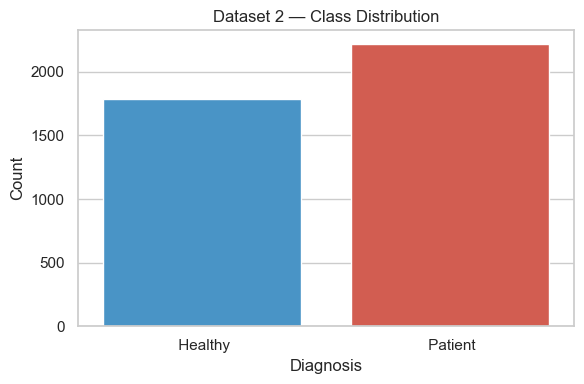

In [11]:
viz.plot_d2_class_distribution(df2)

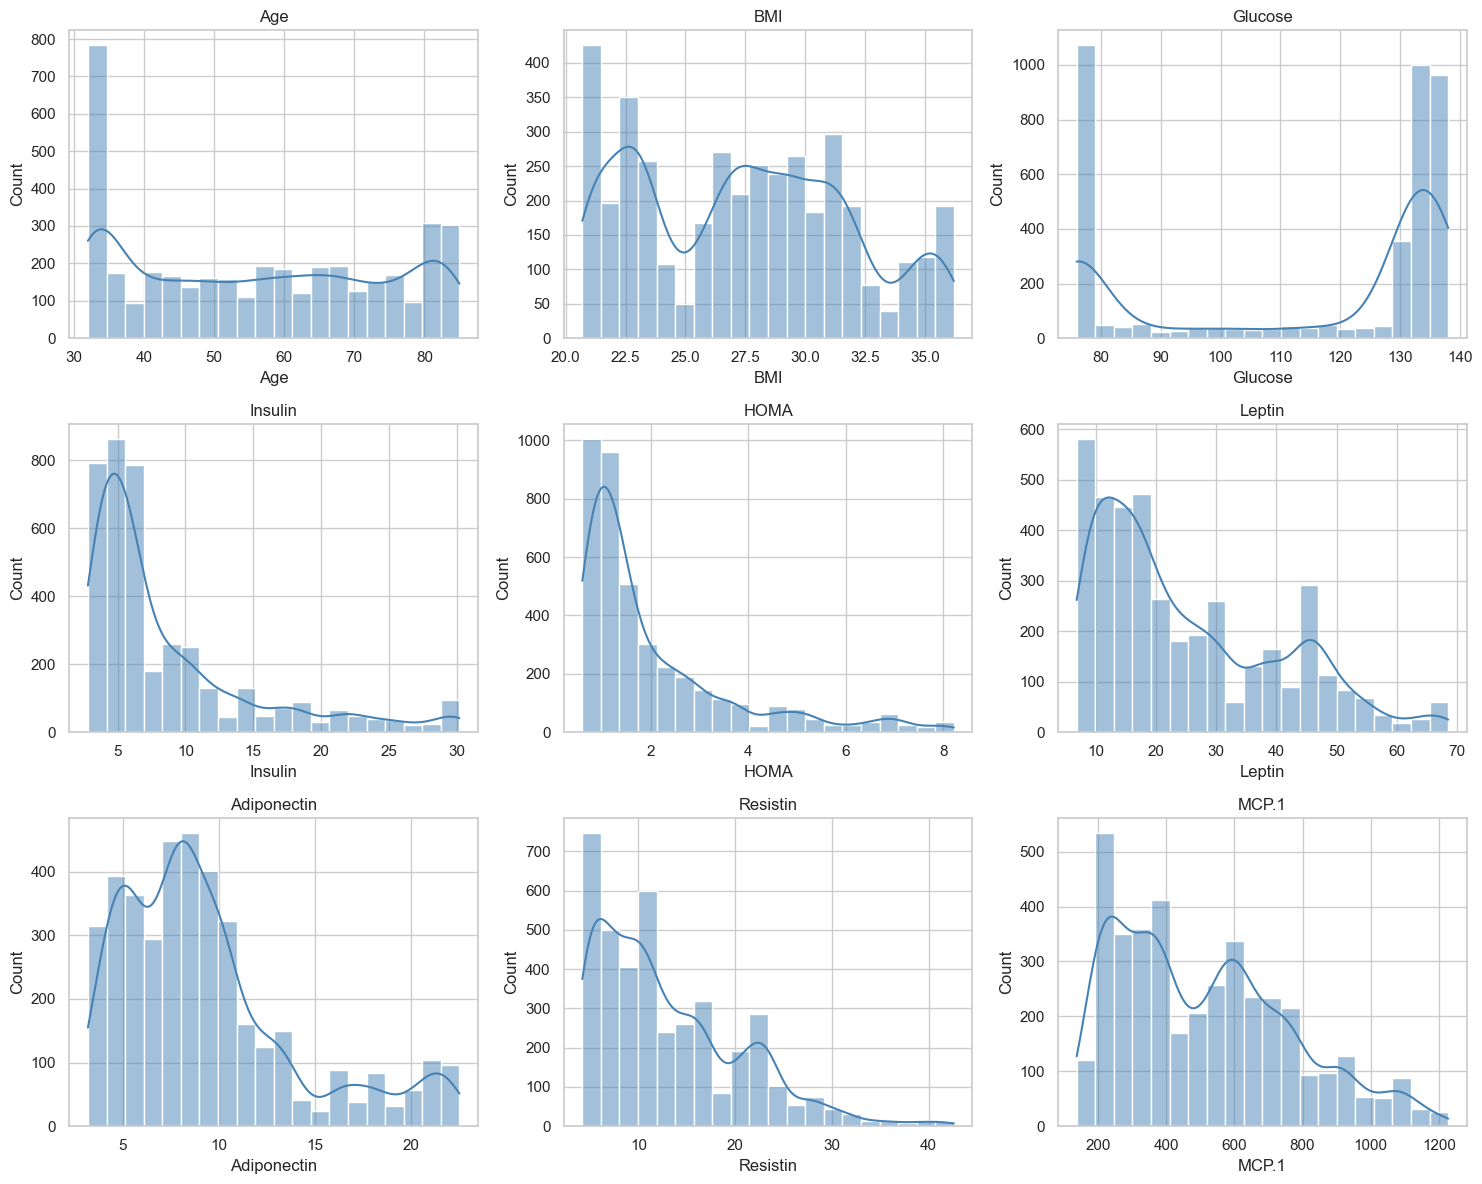

In [12]:
viz.plot_d2_hist(df2)


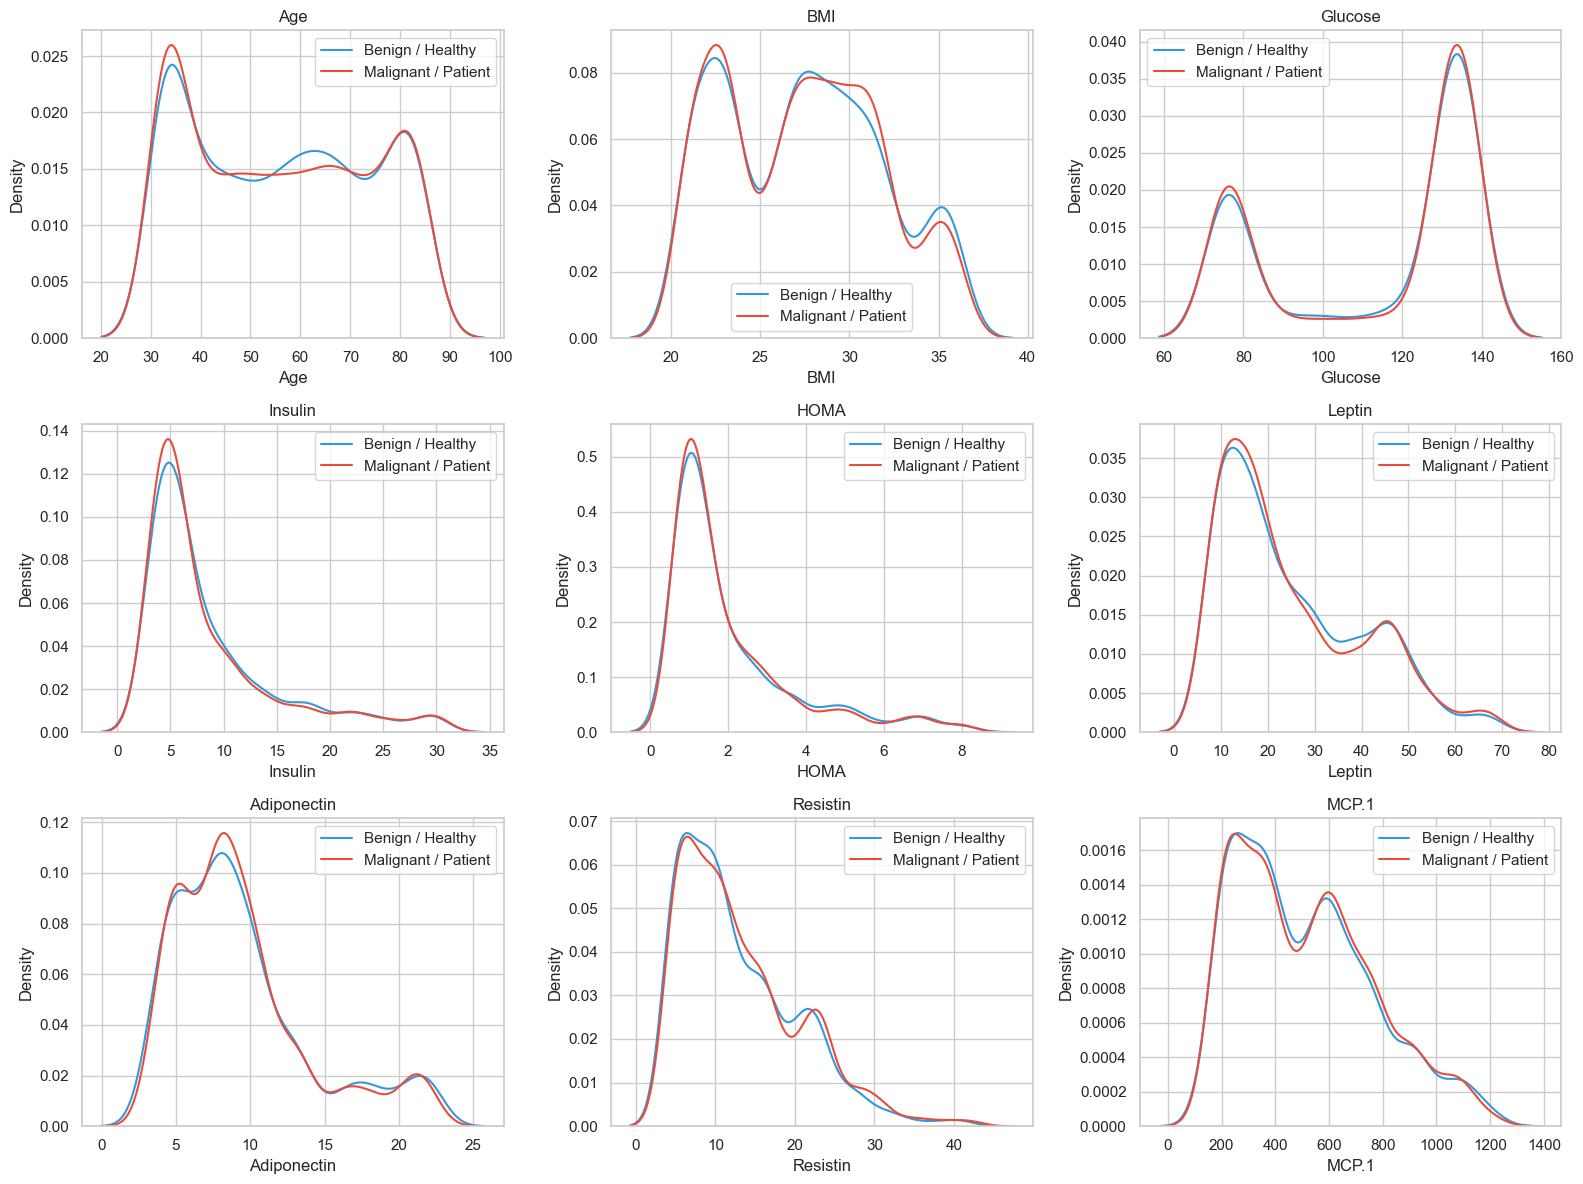

In [13]:
viz.plot_d2_kde(df2)


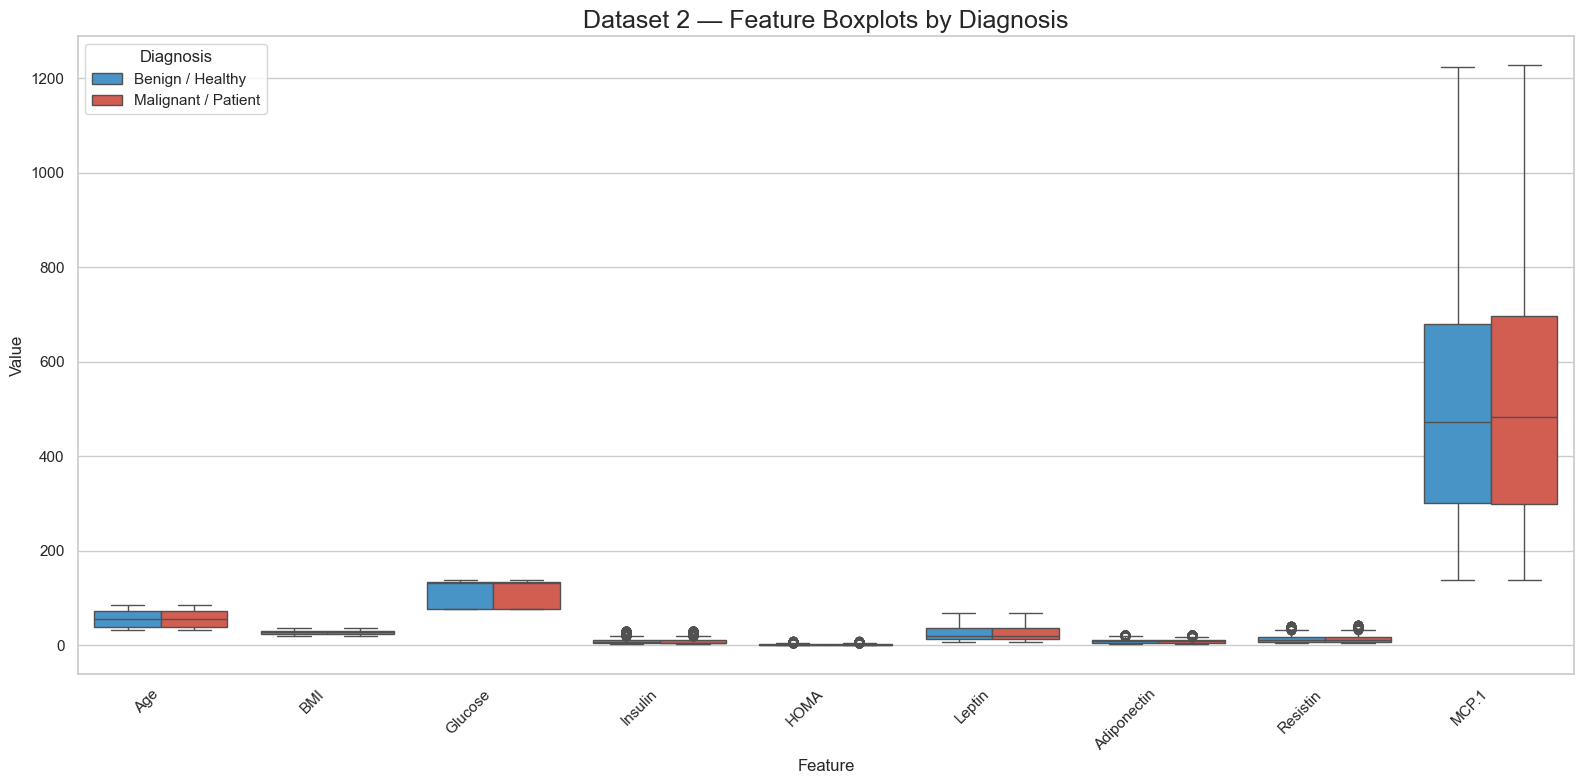

In [14]:
viz.plot_d2_boxplots(df2)


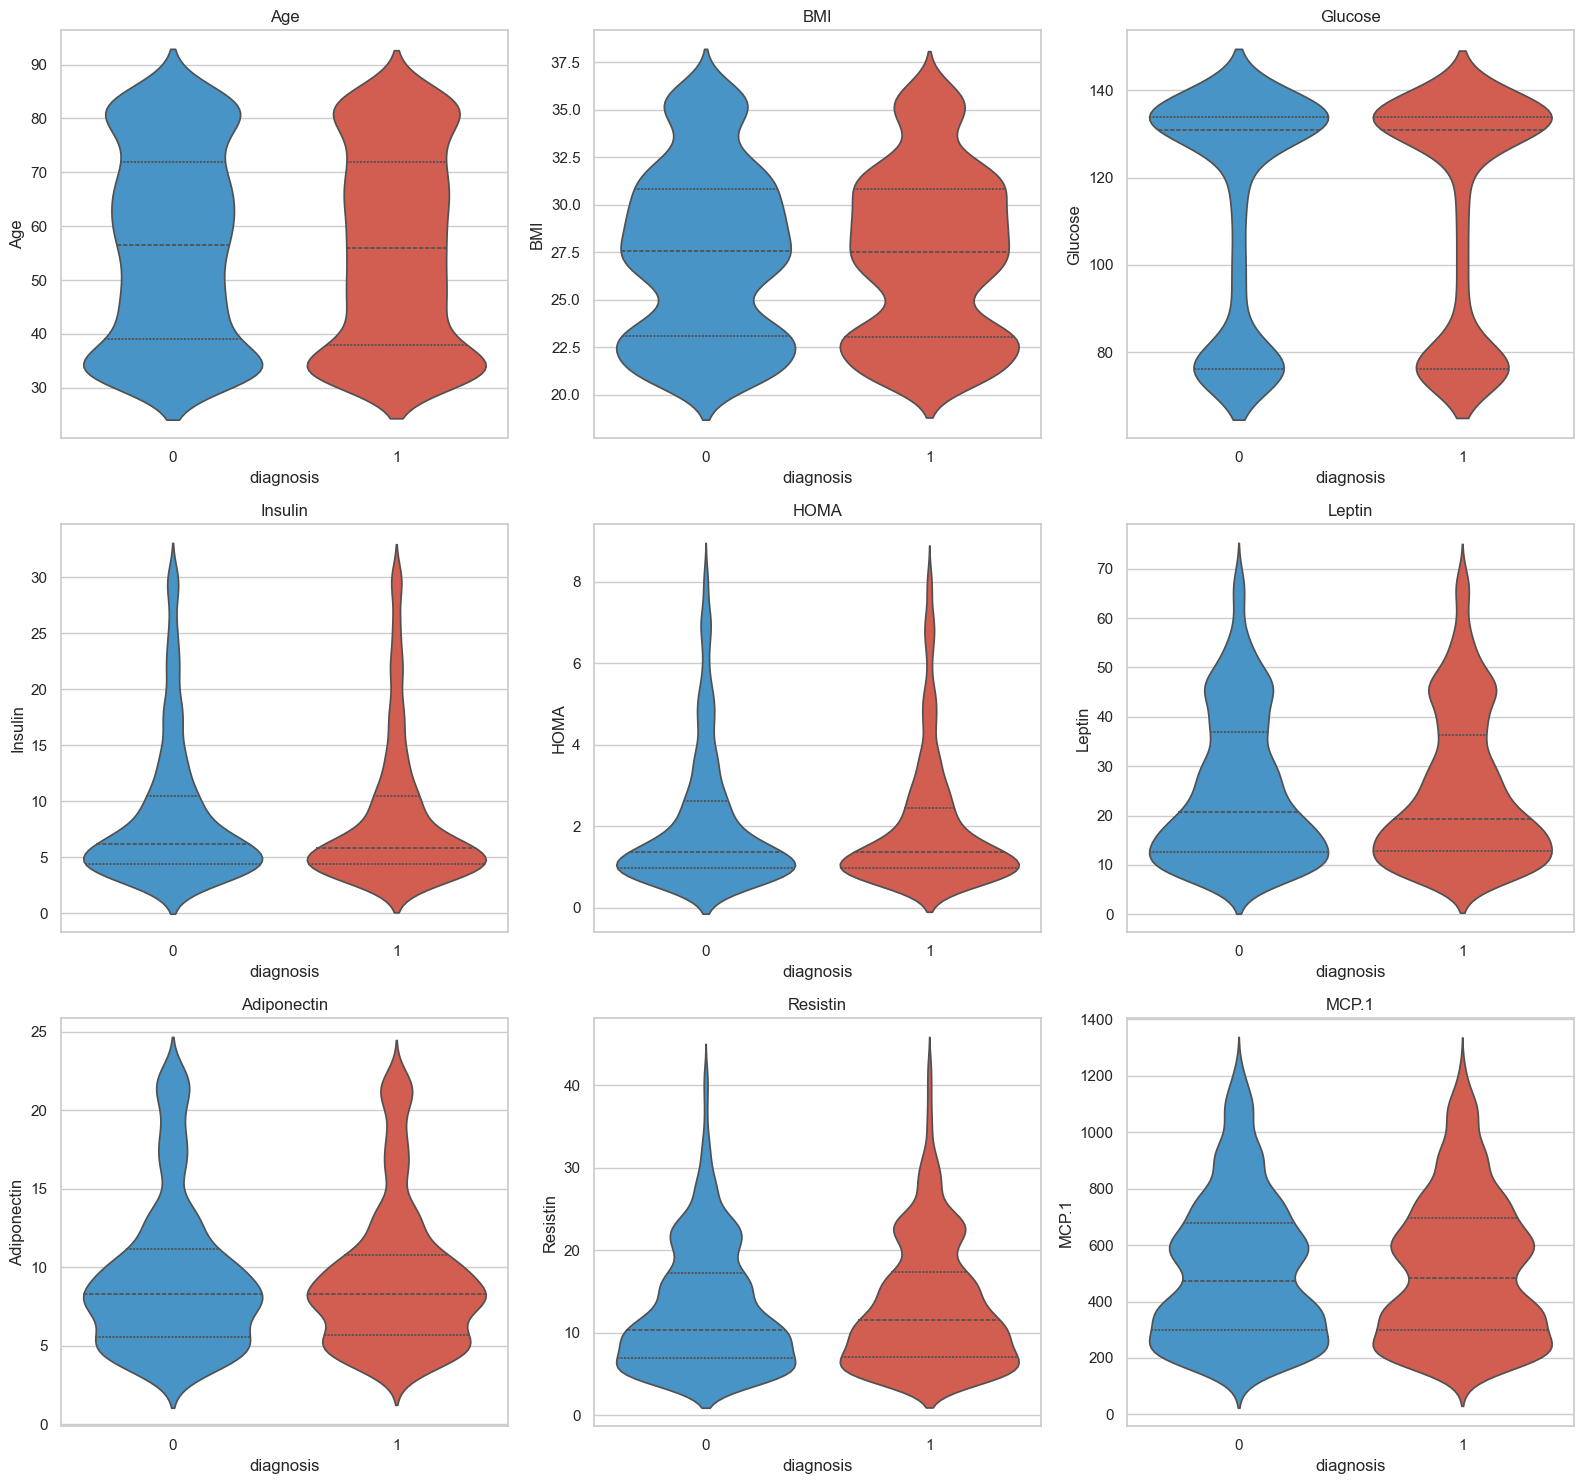

In [15]:
viz.plot_d2_violin(df2)


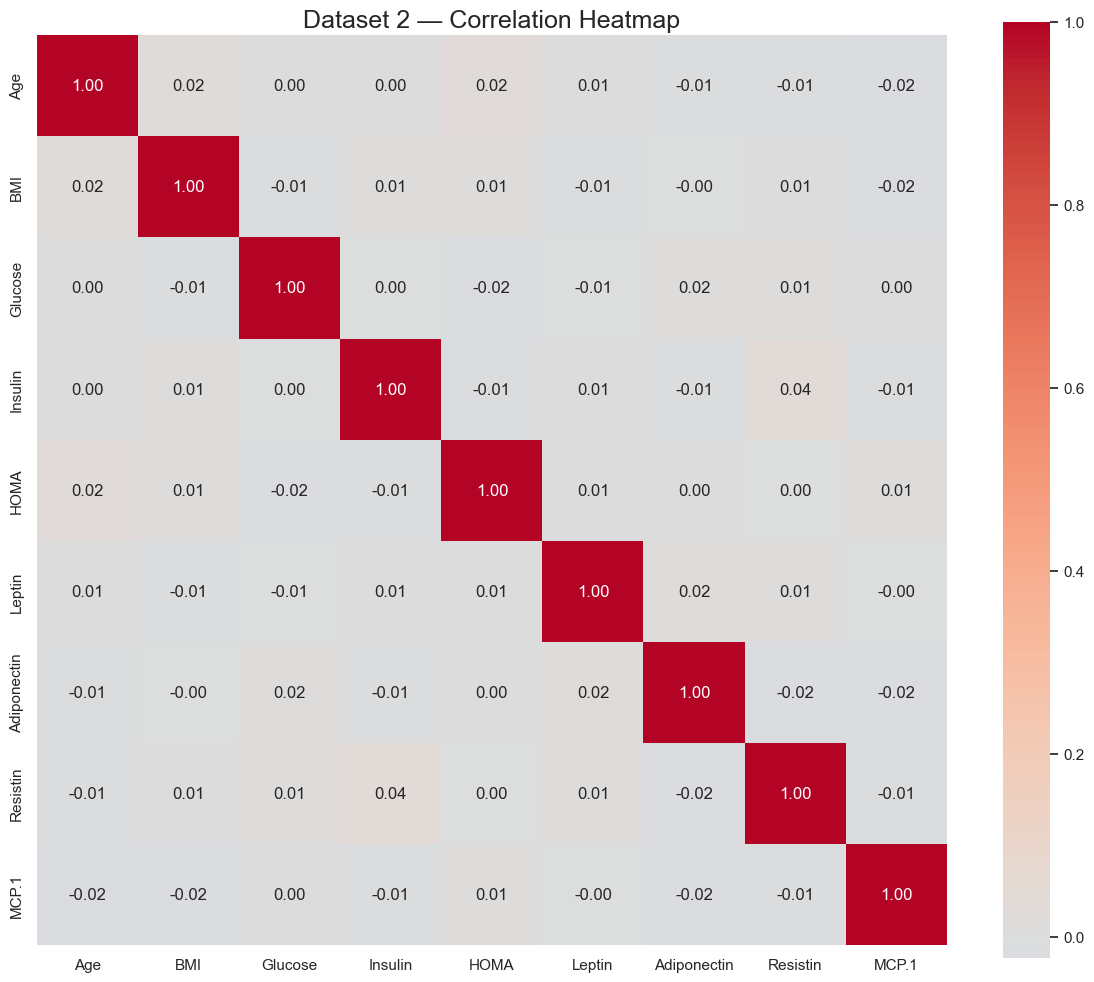

In [16]:
viz.plot_d2_heatmap(df2)


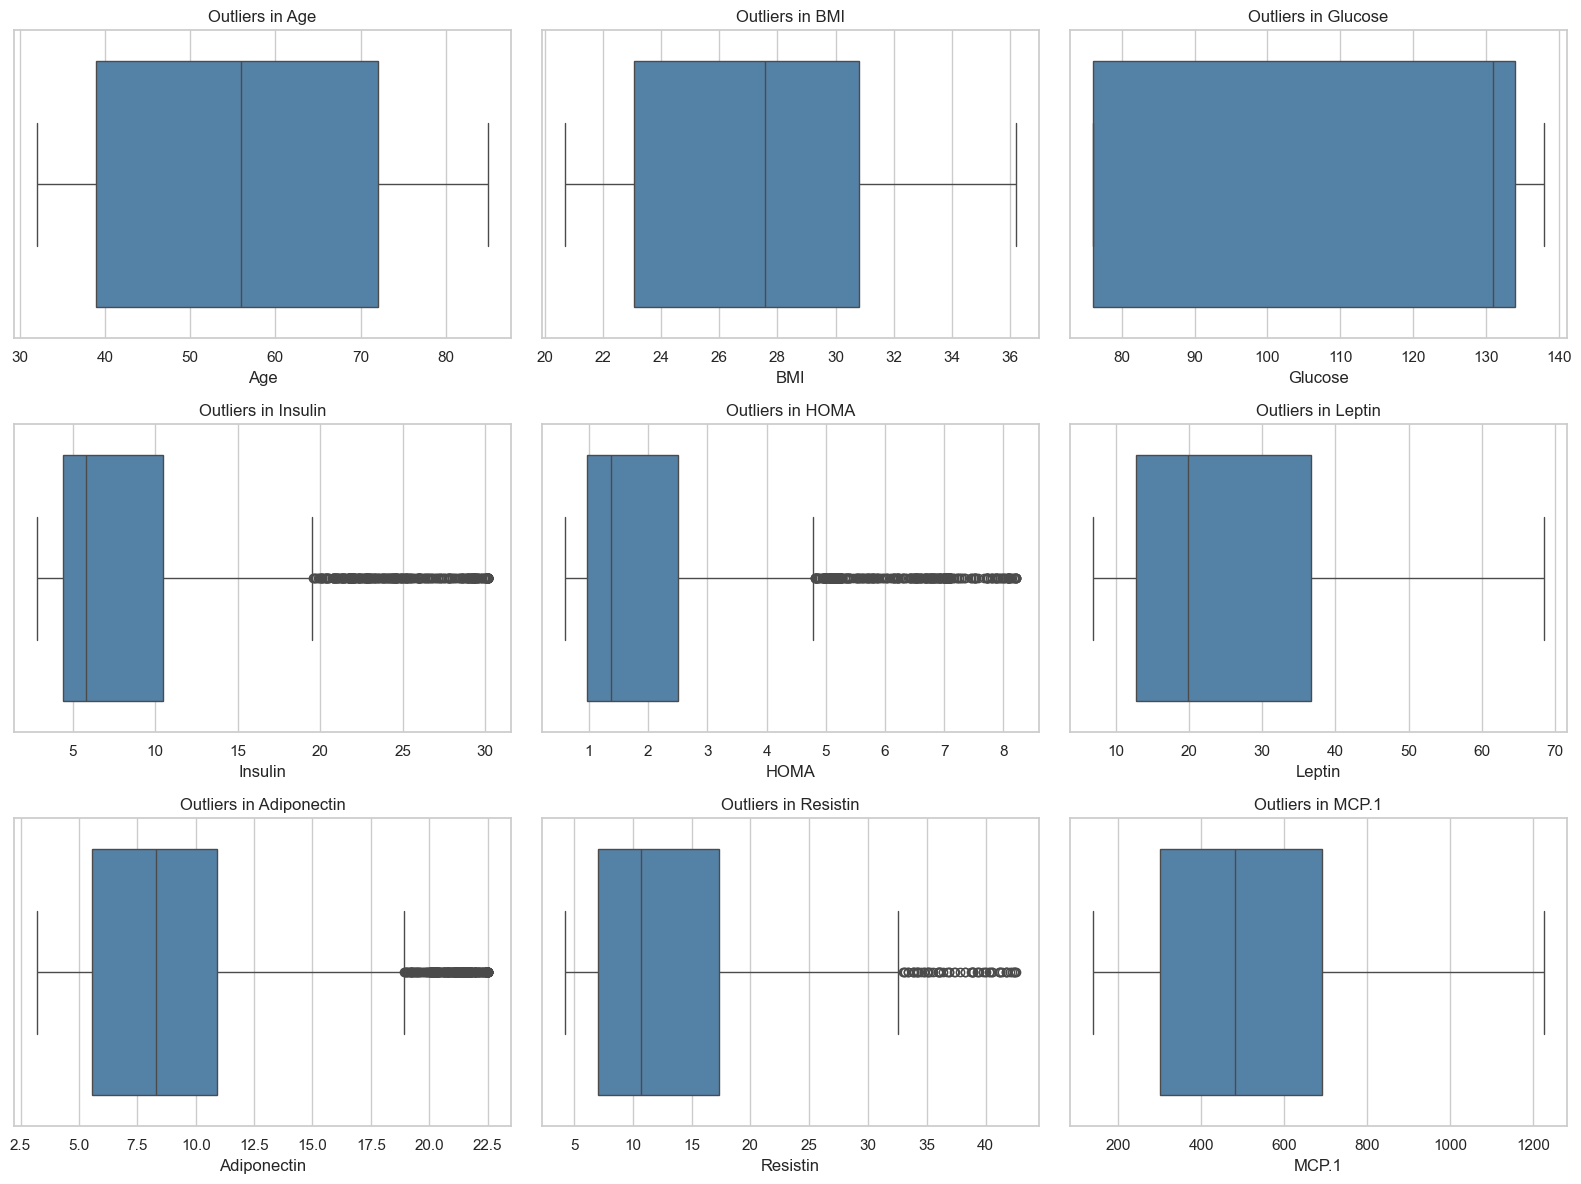

In [17]:
viz.plot_d2_outliers(df2)


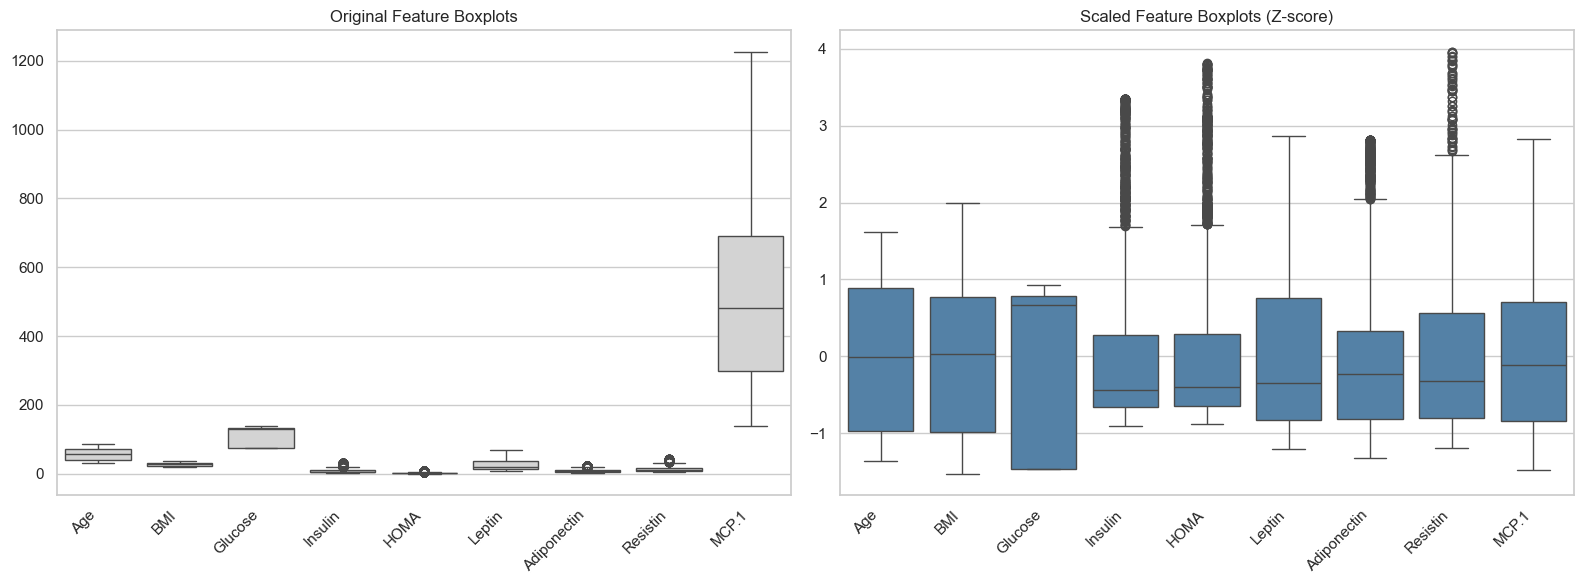

In [18]:
viz.plot_d2_scaled_boxplots(df2)


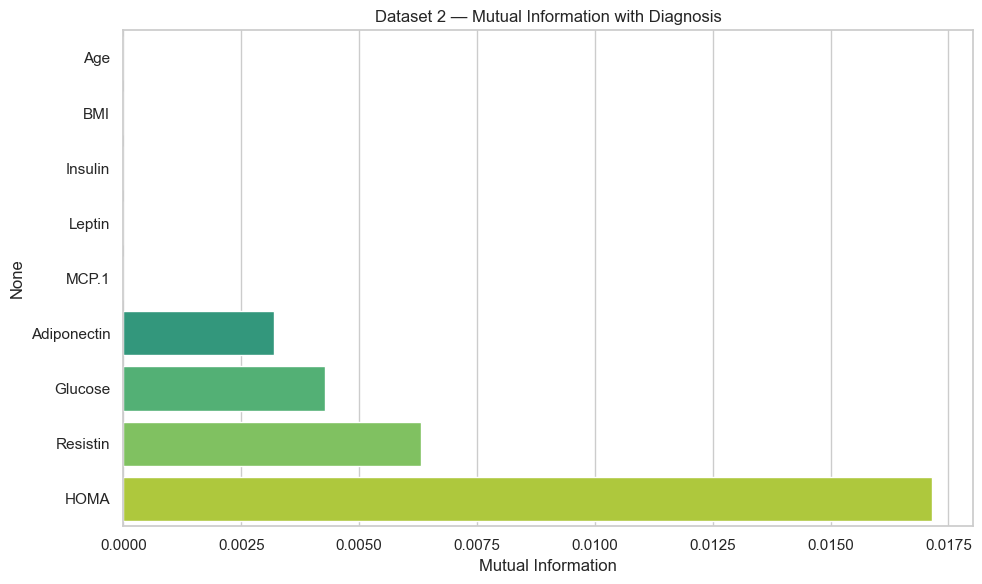

In [19]:
viz.plot_d2_mutual_info(df2)


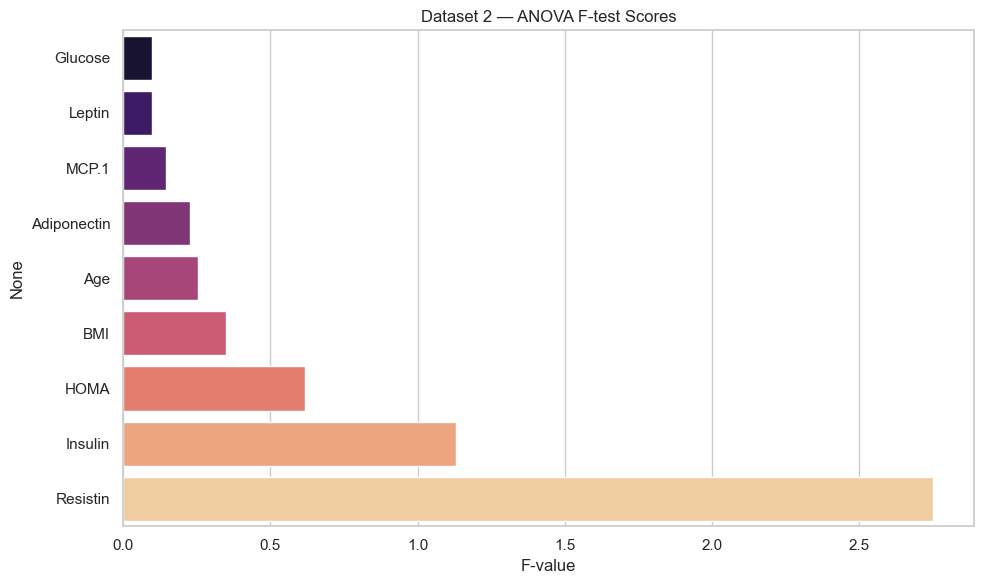

In [20]:
viz.plot_d2_anova(df2)

In [21]:

# Dataset 3 – Prepare standardized features (matching teammate’s code)
raw_df3 = data_loader.load_dataset3_raw("dataset/breast_cancer_dia.csv")
df3 = data_preprocessor.clean_dataset3(raw_df3)

# Split features & target
features = df3.drop(columns=["diagnosis"])
target = df3["diagnosis"].astype(int)

# Standardize (z-score) – this is the KEY missing step
means = features.mean()
stds = features.std()
features_normalized = (features - means) / stds

# Final X and y for modeling
X3 = features_normalized
y3 = target

df3.head()



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


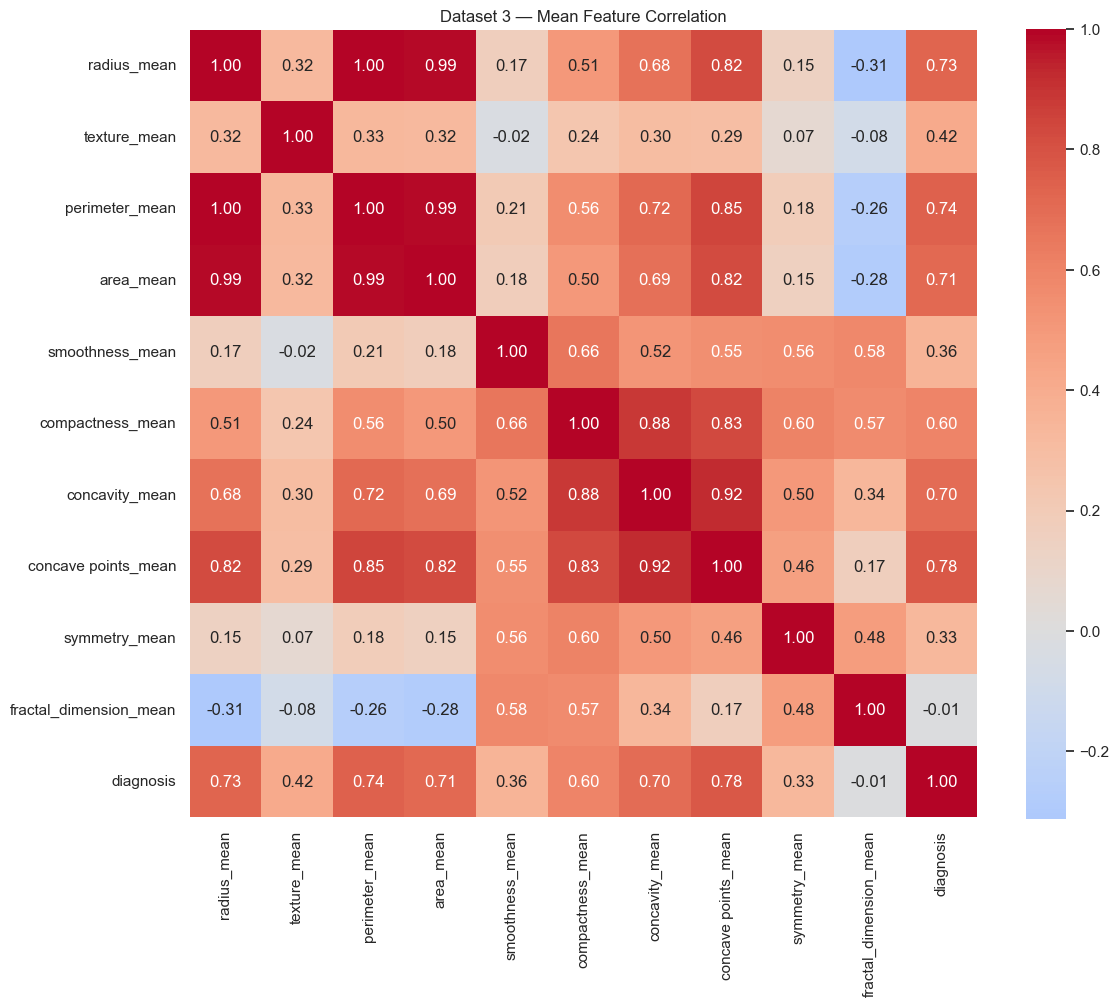

In [22]:
viz.plot_d3_mean_heatmap(df3)


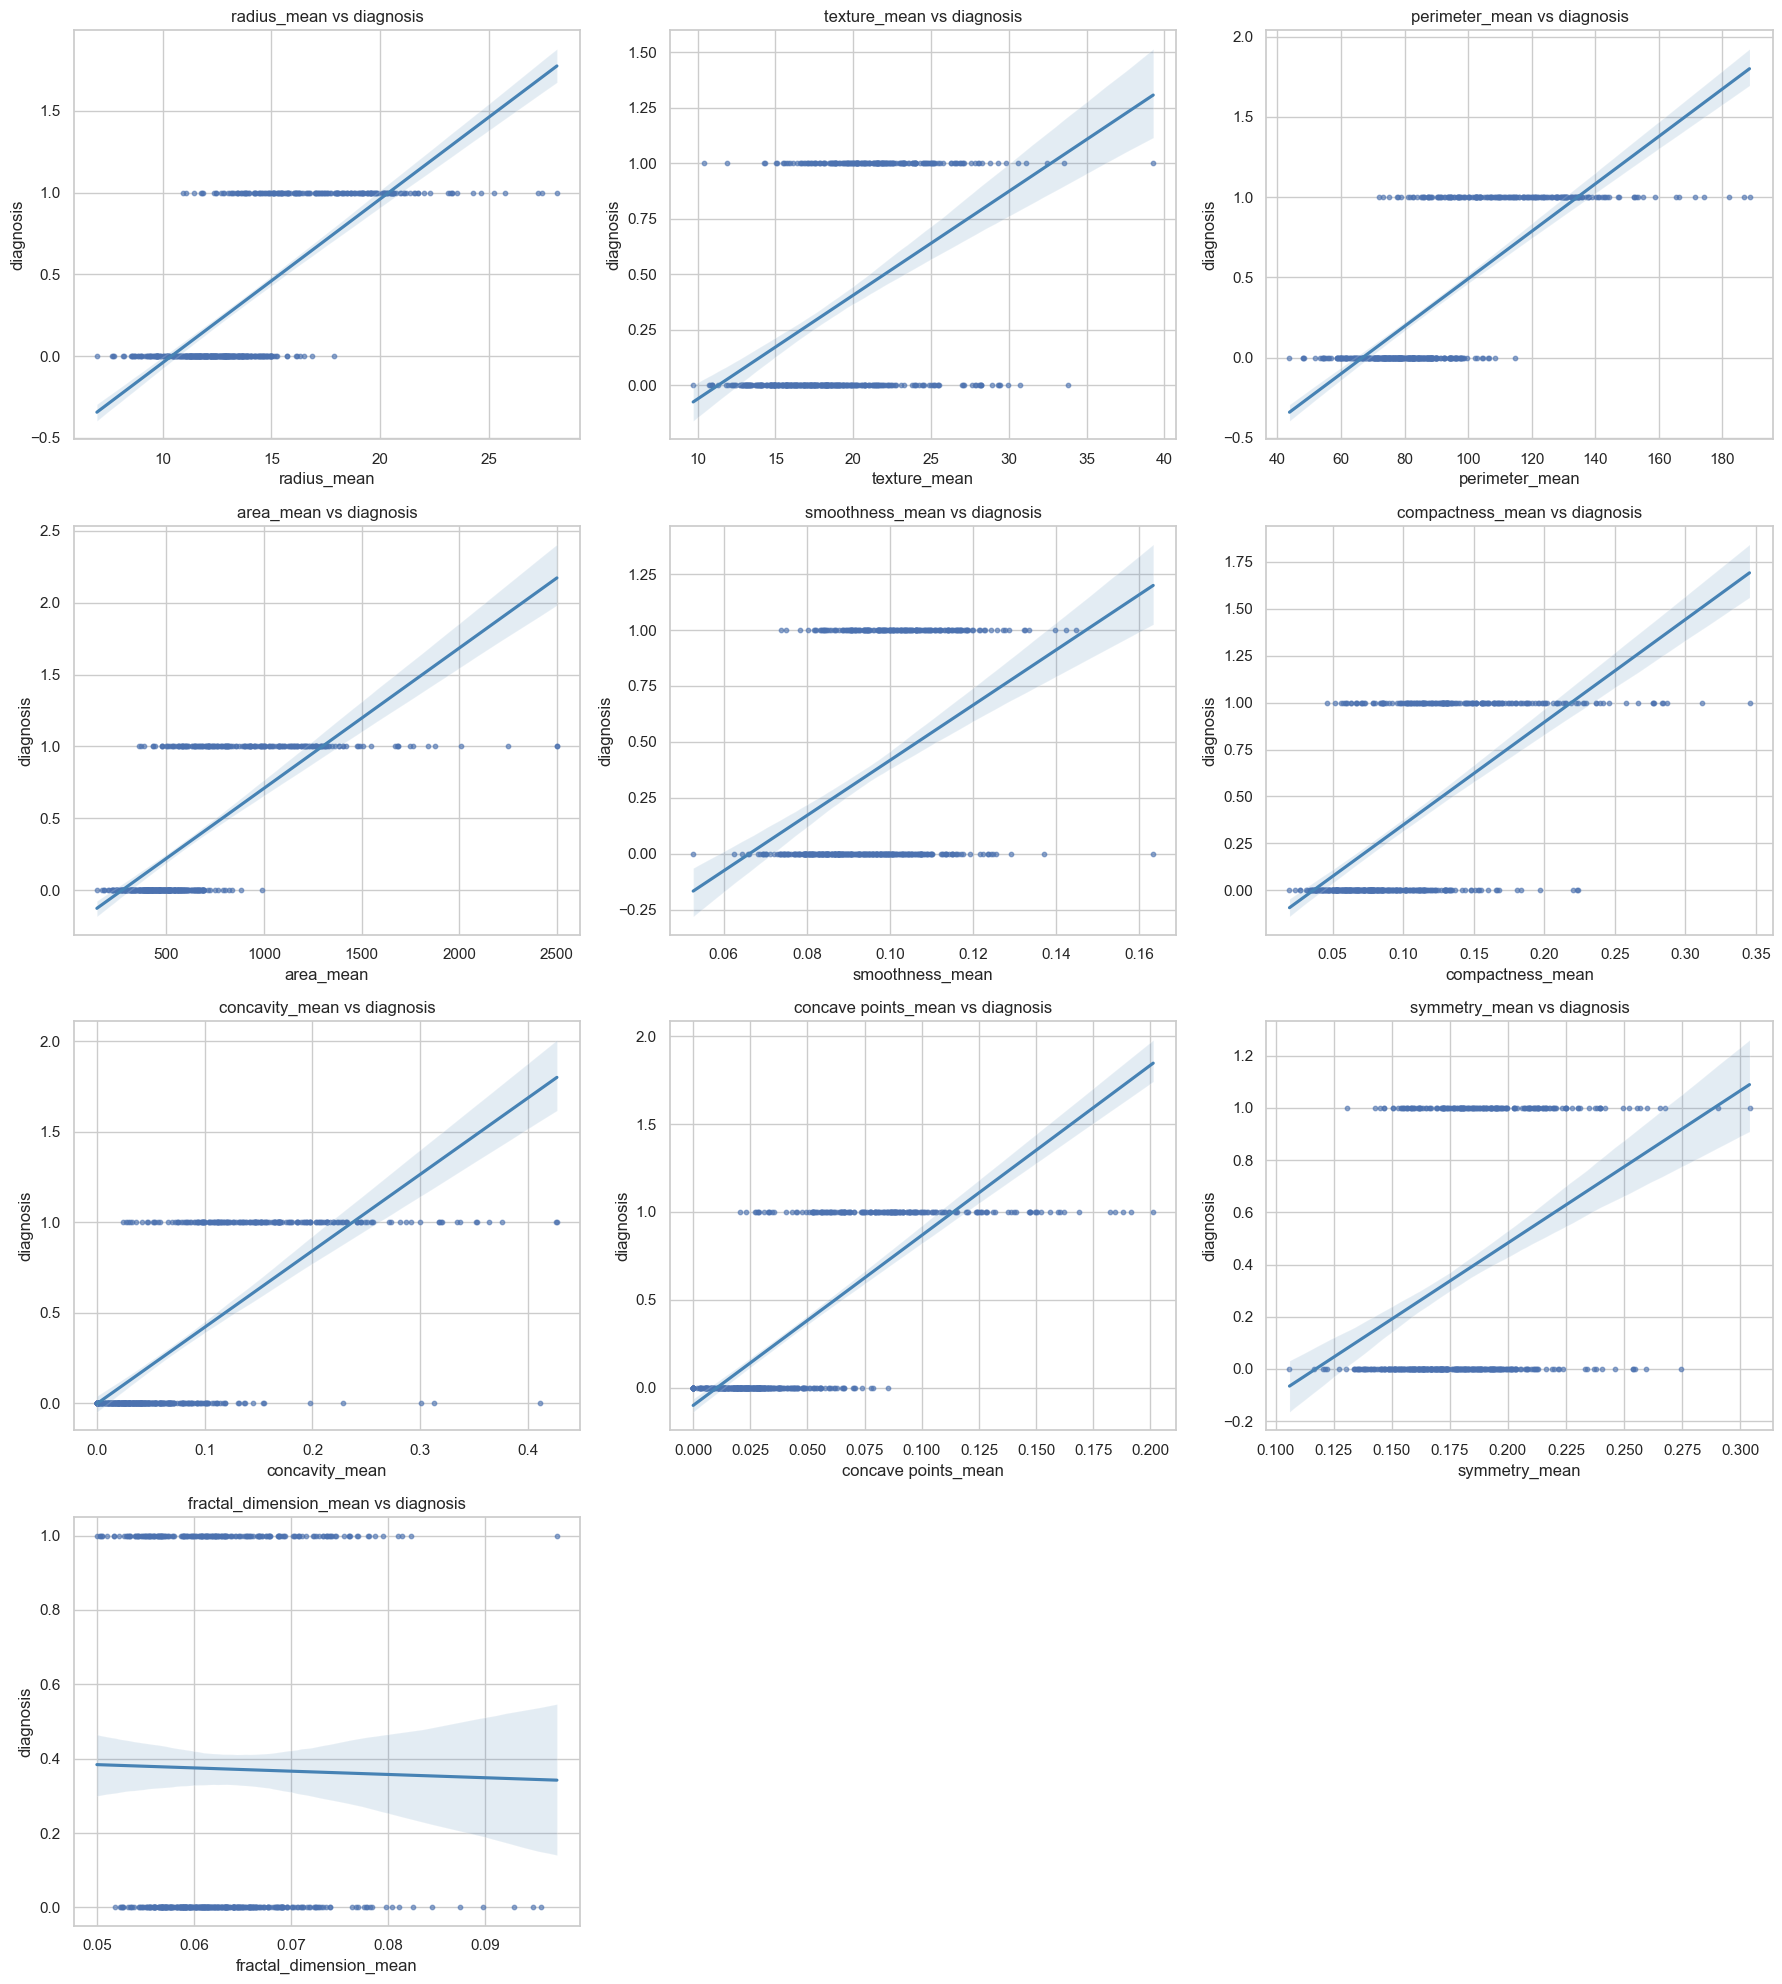

In [23]:
viz.plot_d3_regression_mean(df3)


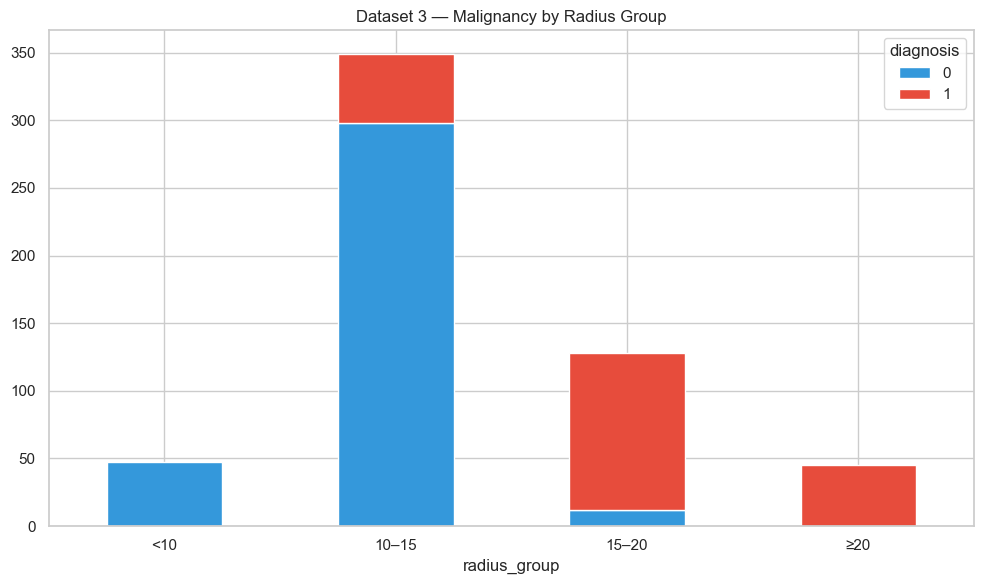

In [24]:
viz.plot_d3_radius_group(df3)


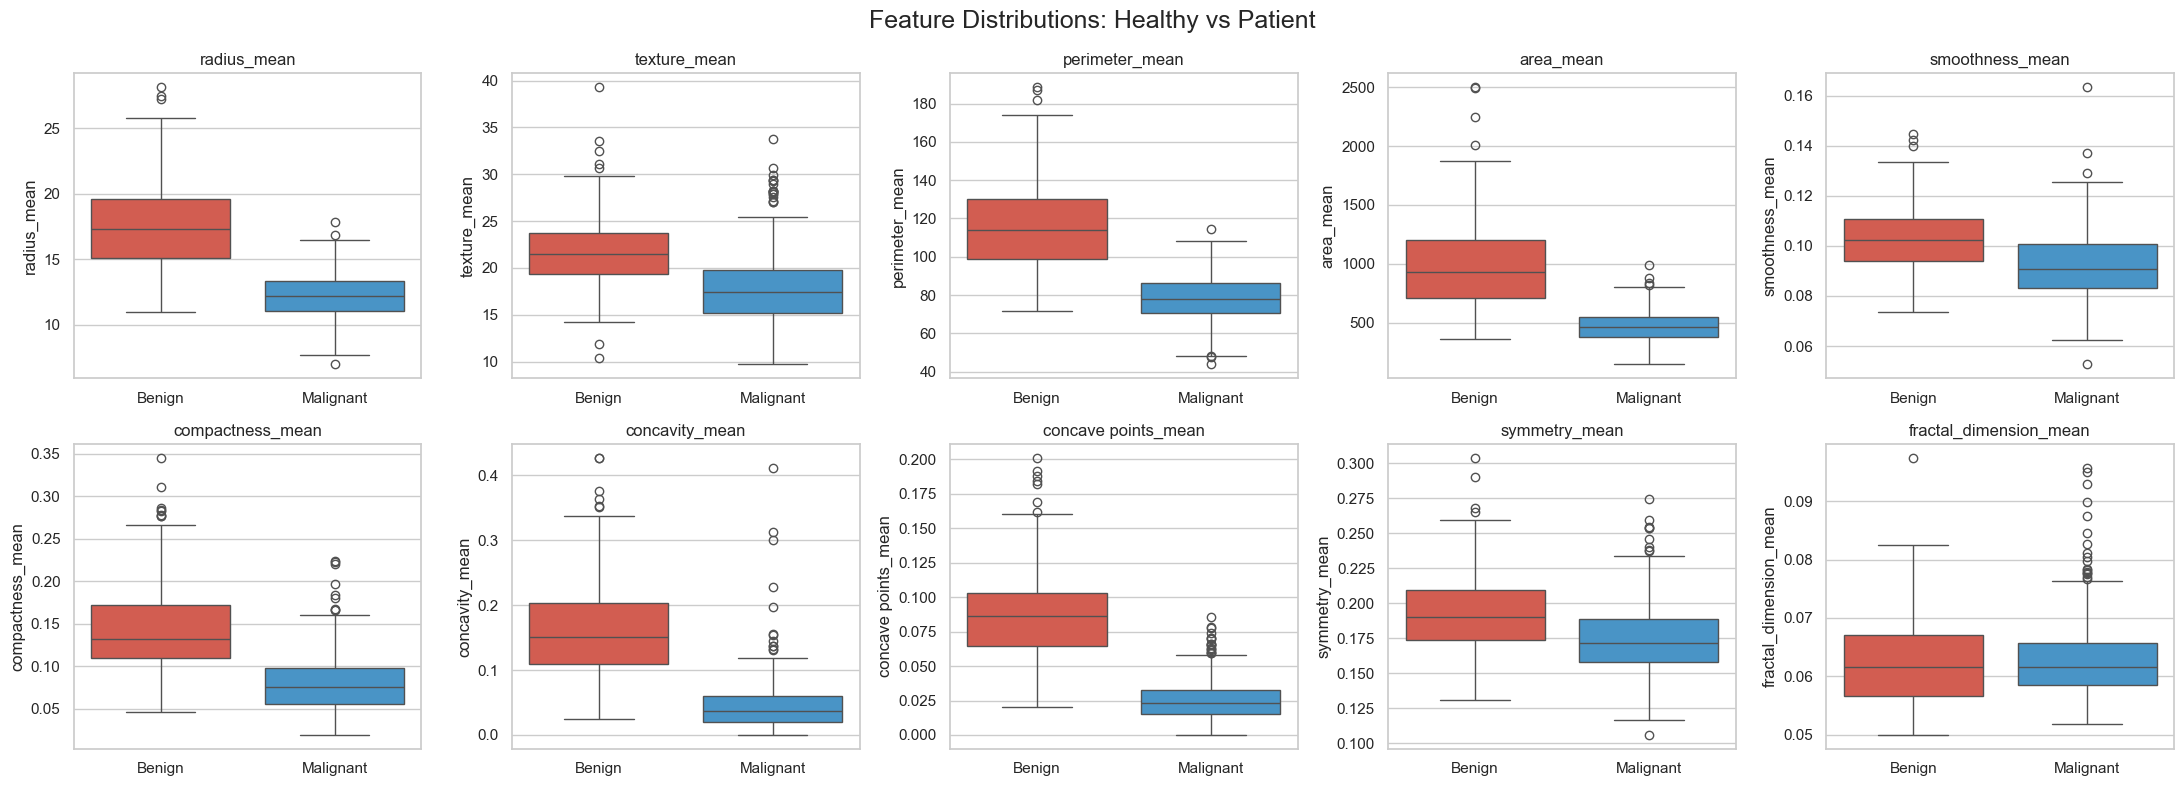

In [25]:
viz.plot_d3_mean_boxplots(df3)

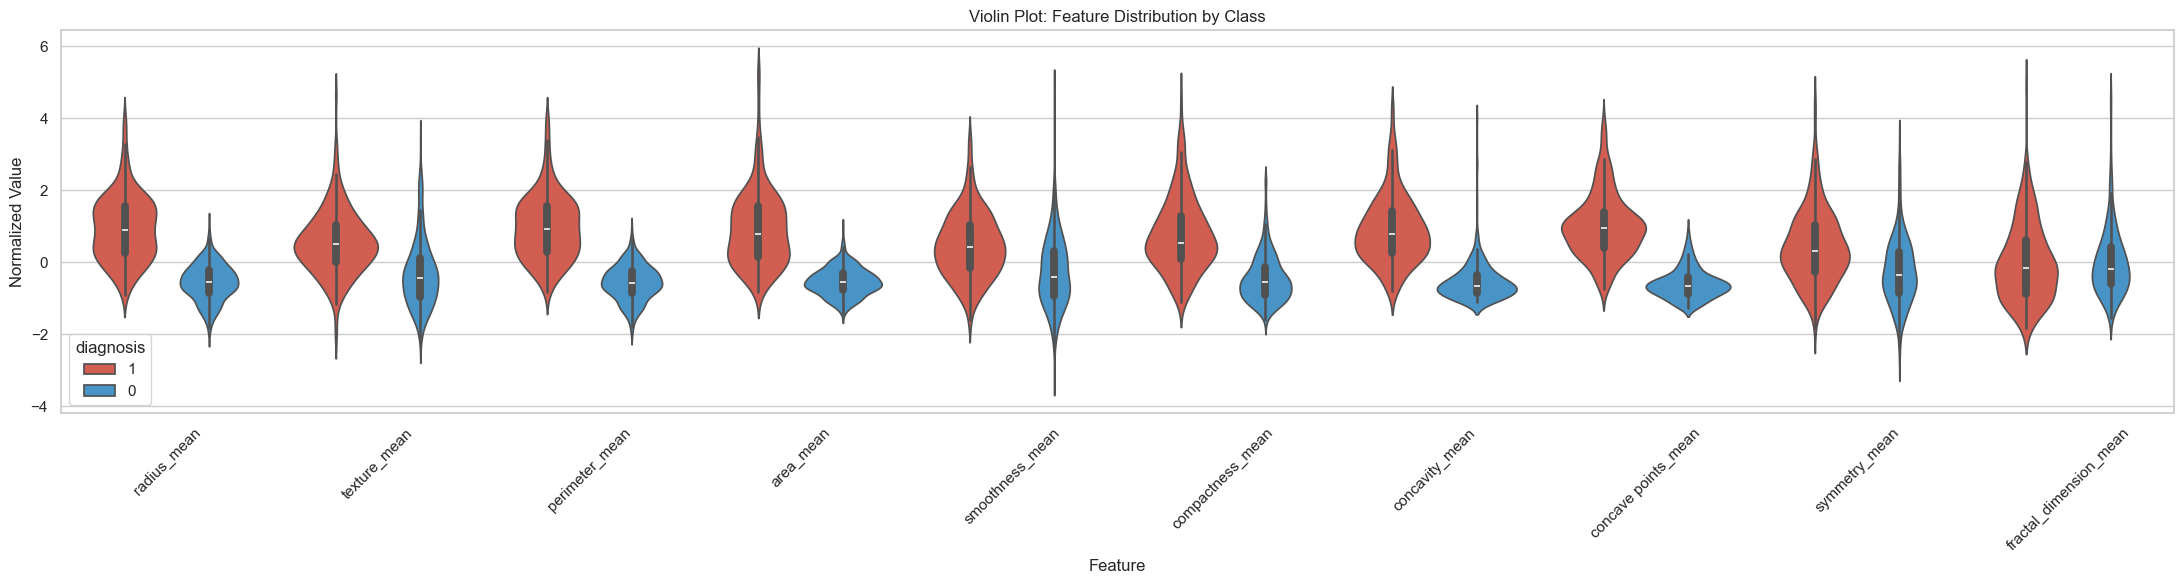

In [26]:
viz.plot_d3_violin(df3)

=== Dataset 3 Model Comparison (10-fold CV) ===
Logistic Regression: 97.72%
KNN (k=1): 94.91%
SVM (RBF, C=0.01): 64.14%
Naive Bayes: 93.15%
Decision Tree: 92.62%
Random Forest: 95.61%
Gradient Boosting: 96.14%


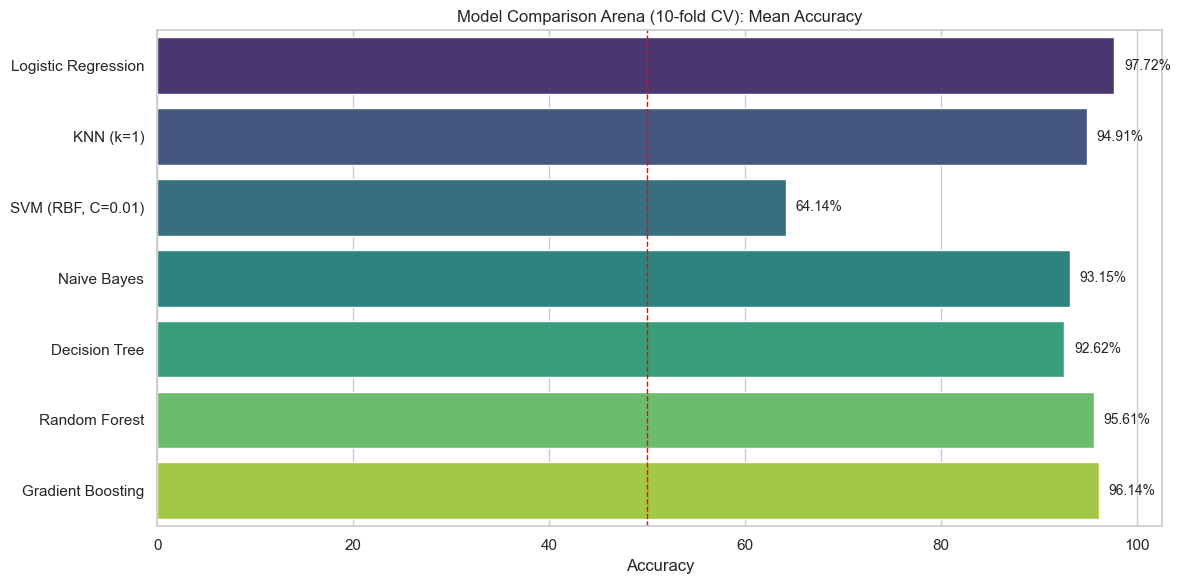

In [27]:

viz.run_d3_model_comparison(df3)

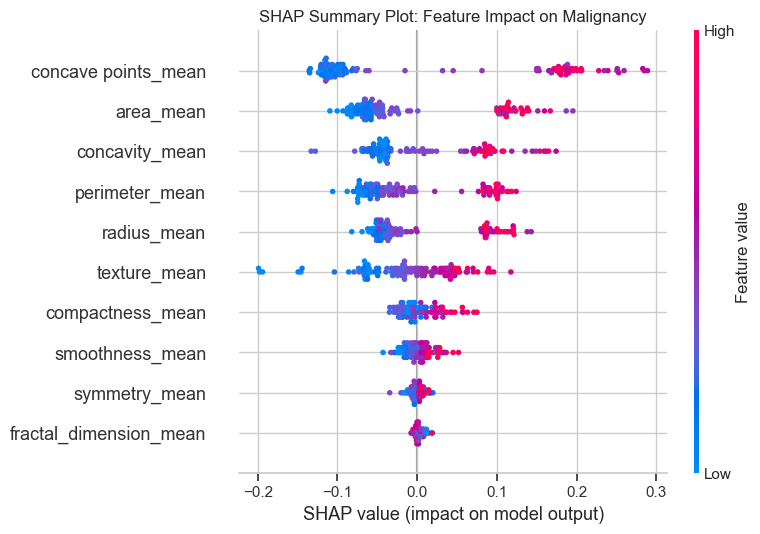

Top Influential Feature: concave points_mean


In [28]:
viz.plot_d3_shap(df3)